In [1]:
from qdisk.model import Keplerian_velocity
from qdisk.classes import FitsImage
import eDiskplot as eplot
from qdisk.utils import is_within
from qdisk.plot import ChannelMap, Map
import analysis_utils as au
from eDisk_source_dict import source_dict
import numpy as np
import matplotlib.pyplot as plt
from astropy.convolution import Gaussian2DKernel, convolve_fft
from analysis_utils import FWHM_to_sigma
from mcmc_tools import log_prior, emcee_run_wrapper, plot_corner, plot_walker
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.patheffects as pe
from astropy.visualization import ImageNormalize
from qdisk.product import calculate_radial_profile
from astropy.visualization import AsinhStretch, SinhStretch
%matplotlib widget
%load_ext autoreload
%autoreload 2

source = "L1489IRS"
config = "SBLB"
line = "C18O"
robust = 1.0
center_coord = source_dict[source]["radec"]
PA = source_dict[source]["PA"]
incl = source_dict[source]["incl"]
distance = source_dict[source]["distance"]
vsys = source_dict[source]["vsys"]

mom0name = au.VADPpath + au.get_image_basename(source, config, line, robust=robust).replace(".fits", "_M0.fits")

Calculating radial profile...
Done.


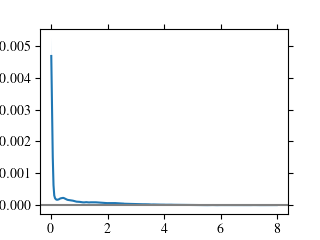

In [4]:
imagename = "/works/yamato/eDisk/L1489IRS/ALMA_pipeline_calibrated_data/L1489IRS_SBLB_continuum_robust_1.0.image.tt0.fits"
rmax = 8
image = FitsImage(imagename, xlim=(-rmax, rmax), ylim=(-rmax, rmax))
r, I, dI = image.radial_profile(PA=PA, incl=incl, wedge_angle=45, rmax=rmax)

plt.figure()
plt.plot(r, I)
plt.fill_between(r, I-dI, I+dI, alpha=0.25)
plt.axhline(y=0.0, color="grey")

In [4]:
# continuum
rmax = 8
wedge = [15, 30, 45, 60, 75, 90]
mapname = au.VADPpath + au.get_image_basename(
    source=source,
    baseline=config,
    line="continuum",
    robust=robust,
    type="image",
    # other="taper_2000klambda",
)
for w in wedge:
    calculate_radial_profile(
        mapname,
        PA=PA,
        incl=incl,
        center_coord=center_coord,
        rmax=rmax,
        wedge_angle=w,
        assume_correlated=True,
        save=True,
        savefileheader="r [arcsec] \t I [mJy/beam] \t dI [mJy/beam]",
    )


Loading data...
0.16666666666666666
Calculating radial profile...
Loading data...
0.3333333333333333
Calculating radial profile...
Loading data...
0.5
Calculating radial profile...
Loading data...
0.6666666666666666
Calculating radial profile...
Loading data...
0.8333333333333334
Calculating radial profile...
Loading data...
1.0
Calculating radial profile...


(0.132751107215892, 0.103748895227916, 14.89246082306)

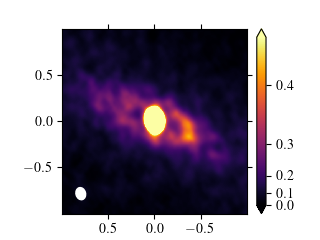

In [57]:
# map
imagename = "./VADP/L1489IRS_SBLB_continuum_robust_1.0_taper_2000klambda.pbcor.tt0.fits"
image = Map(imagename, xlim=(-1,1), ylim=(-1,1), data_scaling_factor=1e3)
image.plot_colormap(cmap="inferno", vmin=0.0, stretch=SinhStretch(), vmax=0.45)
image.add_beam()
image.add_colorbar()
image.beam

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


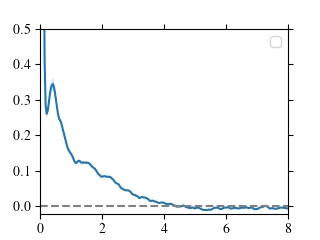

In [15]:
# plot
uvtaper = ["_taper_1000klambda", "_taper_2000klambda", "_taper_3000klambda", ""]
uvtaper = ["_taper_2000klambda"]
# uvtaper = [""]
plt.figure()
for taper in uvtaper:
    profilename = f"./VADP/L1489IRS_SBLB_continuum_robust_1.0{taper}.pbcor.tt0_radialProfileWedge45deg.txt"
    r, I, dI = np.loadtxt(profilename, unpack=True)
    I *= 1e3
    dI *=1e3

    
    plt.plot(r, I, label=taper)
    plt.fill_between(r, I-dI, I+dI, alpha=0.2)
    # plt.yscale("log")
    plt.xlim(0, 8)
    plt.ylim(-0.02, 0.5)
    plt.axhline(y=0.0, color="grey", ls="dashed")
    plt.legend()

In [11]:
np.sqrt(1**2+1.5**2)

1.8027756377319946

In [7]:
calculate_radial_profile(
    mapname,
    PA=PA,
    incl=incl,
    center_coord=center_coord,
    rmax=rmax,
    thetamin=-180,
    thetamax=-135,
    abs_theta=True,
    assume_correlated=True,
    save=True,
    savefileheader="r [arcsec] \t I [mJy/beam km/s] \t dI [mJy/beam]",
    savefilename=au.VADPpath
    + au.get_image_basename(
        source=source, baseline=config, line="continuum", robust=robust, type="pbcor"
    ).replace(".fits", "_radialProfileWedge45deg_west.txt"),
)


Loading data...
0.25
Calculating radial profile...


(array([0.01163395, 0.03490185, 0.05816975, 0.08143765, 0.10470555,
        0.12797345, 0.15124135, 0.17450925, 0.19777715, 0.22104506,
        0.24431296, 0.26758086, 0.29084876, 0.31411666, 0.33738456,
        0.36065246, 0.38392036, 0.40718826, 0.43045616, 0.45372406,
        0.47699196, 0.50025986, 0.52352776, 0.54679566, 0.57006356,
        0.59333146, 0.61659937, 0.63986727, 0.66313517, 0.68640307,
        0.70967097, 0.73293887, 0.75620677, 0.77947467, 0.80274257,
        0.82601047, 0.84927837, 0.87254627, 0.89581417, 0.91908207,
        0.94234997, 0.96561787, 0.98888577, 1.01215367, 1.03542158,
        1.05868948, 1.08195738, 1.10522528, 1.12849318, 1.15176108,
        1.17502898, 1.19829688, 1.22156478, 1.24483268, 1.26810058,
        1.29136848, 1.31463638, 1.33790428, 1.36117218, 1.38444008,
        1.40770798, 1.43097589, 1.45424379, 1.47751169, 1.50077959,
        1.52404749, 1.54731539, 1.57058329, 1.59385119, 1.61711909,
        1.64038699, 1.66365489, 1.68692279, 1.71

In [7]:
rmax = 8

linelist = ["12CO", "13CO", "C18O", "SO"]
robust = {"12CO": 0.5, "13CO": 0.5, "C18O": 1.0, "SO": 1.0}
wedge = [30, 60, 90]

for w in wedge:
    for line in linelist:
        mom0name = au.VADPpath + au.get_image_basename(source, config, line, robust=robust[line]).replace(".fits", "_M0.fits")
        calculate_radial_profile(mom0name, PA=PA, incl=incl, center_coord=center_coord, rmax=rmax, wedge_angle=w, save=True, savefileheader="r [arcsec] \t I [mJy/beam km/s] \t dI [mJy/beam km/s]")

Loading data...
Calculating radial profile...
Loading data...
Calculating radial profile...
Loading data...
Calculating radial profile...
Loading data...
Calculating radial profile...
Loading data...
Calculating radial profile...
Loading data...
Calculating radial profile...
Loading data...
Calculating radial profile...
Loading data...
Calculating radial profile...
Loading data...
Calculating radial profile...
Loading data...
Calculating radial profile...
Loading data...
Calculating radial profile...
Loading data...
Calculating radial profile...


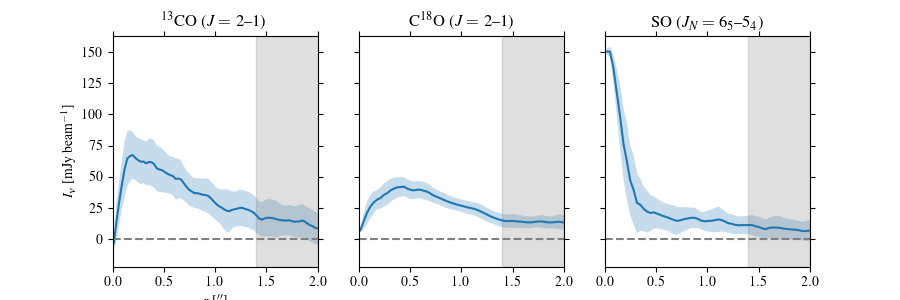

In [29]:
linelist = ["13CO", "C18O", "SO"]

fig, axes = plt.subplots(1, len(linelist), sharex=True, sharey=True, figsize=(9, 3))

wedge = 90

for i, line in enumerate(linelist):

    ax = axes[i]

    radprofname = au.VADPpath + au.get_image_basename(
        source, config, line, robust=robust[line]
    ).replace(".fits", "_M0_radialProfileWedge{}deg.txt".format(wedge))
    r, I, dI = np.loadtxt(radprofname, unpack=True)

    ax.plot(r, I, color="tab:blue")
    ax.fill_between(r, I-dI, I+dI, color="tab:blue", alpha=0.25, edgecolor=None)

    ax.axhline(y=0.0, color="grey", ls="dashed")
    ax.axvspan(xmin=1.4, xmax=2.0, color="grey", alpha=0.25, edgecolor=None)

    ax.set_title(eplot.linelabel[line])

    if i == 0:
        ax.set(xlim=(0.0, 2), xlabel="$r$ [$^{\prime\prime}$]", ylabel=r"$I_{\nu}$ [mJy beam$^{-1}$]")

    fig.savefig(au.figurepath + "13CO_C18O_SO_radialprofile_gallery.pdf", bbox_inches="tight", pad_inches=0.01)


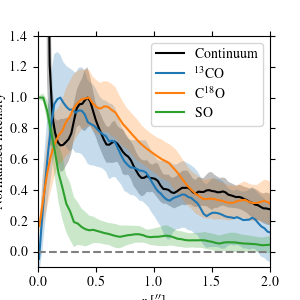

In [42]:
# comparison
fig, ax = plt.subplots(1, 1, figsize=(3, 3))

# continuum
radprofname = au.VADPpath + au.get_image_basename(
    source, config, "continuum", robust=1.0
).replace(".fits", "_radialProfileWedge{}deg.txt".format(wedge))
r, I, dI = np.loadtxt(radprofname, unpack=True)

# normalize by ring peak
dI /= np.nanmax(I[r > 0.3])
I /= np.nanmax(I[r > 0.3])

ax.plot(r, I, color="black", label="Continuum")
ax.fill_between(r, I-dI, I+dI, color="black", alpha=0.25, edgecolor=None)

for i, line in enumerate(linelist):

    radprofname = au.VADPpath + au.get_image_basename(
        source, config, line, robust=robust[line]
    ).replace(".fits", "_M0_radialProfileWedge{}deg.txt".format(wedge))
    r, I, dI = np.loadtxt(radprofname, unpack=True)

    dI /= np.nanmax(I)
    I /= np.nanmax(I)

    ax.plot(r, I, label=eplot.linelabel_noqn[line])
    ax.fill_between(r, I - dI, I + dI, alpha=0.25, edgecolor=None)

ax.set(xlim=(0.0, 2.0), ylim=(-0.1, 1.4), xlabel="$r$ [$^{\prime\prime}$]", ylabel=r"Normalized intensity")
ax.axhline(y=0.0, color="grey", ls="dashed")
ax.legend()

fig.savefig("13CO_C18O_SO_radialprofile_comparison.pdf", bbox_inches="tight", pad_inches=0.01)


In [4]:
line = "13CO"
dv = 0.2
rmax = 3
mapname = au.VADPpath + au.get_image_basename(source=source, baseline=config, line=line, robust=robust, dv=dv).replace(".fits", "_M8.fits")
savefilename = au.VADPpath + au.get_image_basename(
        source=source, baseline=config, line="continuum", robust=robust, type="pbcor"
    ).replace(".fits", "_radialProfileWedge45degFarside.txt")
r, I, dI = calculate_radial_profile(
    mapname,
    PA=PA,
    incl=incl,
    center_coord=center_coord,
    rmax=rmax,
    thetamin=-180,
    thetamax=-135,
    exclude_theta=True,
    assume_correlated=True,
    save=False,
    savefileheader="r [arcsec] \t I [mJy/beam km/s] \t dI [mJy/beam]",
    savefilename=savefilename
)

Loading data...
0.875
Calculating radial profile...


Loading data...
0.125
Calculating radial profile...
Loading data...
0.125
Calculating radial profile...


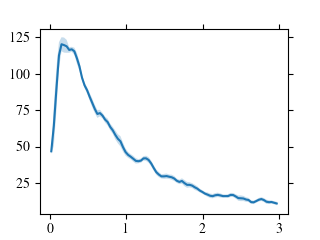

In [5]:
plt.figure()
line = "13CO"
dv = 0.2
rmax = 3
mapname = au.VADPpath + au.get_image_basename(source=source, baseline=config, line=line, robust=robust, dv=dv).replace(".fits", "_M0.fits")
r, I1, dI1 = calculate_radial_profile(
    mapname,
    PA=PA,
    incl=incl,
    center_coord=center_coord,
    rmax=rmax,
    thetamin=-180,
    thetamax=-135,
    # wedge_angle=22.5,
    # abs_theta=True,
    # exclude_theta=True,
    assume_correlated=True,
    save=False,
    # savefileheader="r [arcsec] \t I [mJy/beam km/s] \t dI [mJy/beam]",
    # savefilename=savefilename
)
# plt.plot(r, I)
# plt.fill_between(r, I - dI, I + dI, alpha=0.25, edgecolor=None)
r, I2, dI2 = calculate_radial_profile(
    mapname,
    PA=PA,
    incl=incl,
    center_coord=center_coord,
    rmax=rmax,
    thetamin=-45,
    thetamax=0.0,
    # abs_theta=True,
    assume_correlated=True,
    save=False,
    # savefileheader="r [arcsec] \t I [mJy/beam km/s] \t dI [mJy/beam]",
    # savefilename=savefilename
)
I = (I1 + I2) / 2
dI = (dI1 + dI2) / 2
plt.plot(r, I)
plt.fill_between(r, I - dI, I + dI, alpha=0.25, edgecolor=None)

Calculating radial profile...
Done.
Calculating radial profile...
Done.
Calculating radial profile...
Done.
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/yamato/Project/eDisk/firstlook_L1489IRS/.venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_320959/3461943318.py", line 14, in <cell line: 6>
    mom0map = FitsImage(mapname, xlim=(-rmax, rmax), ylim=(-rmax, rmax))
  File "/home/yamato/Project/eDisk/firstlook_L1489IRS/.venv/lib/python3.8/site-packages/qdisk/classes.py", line 296, in __init__
    self.header = fits.getheader(fitsname)
  File "/home/yamato/Project/eDisk/firstlook_L1489IRS/.venv/lib/python3.8/site-packages/astropy/io/fits/convenience.py", line 103, in getheader
    hdulist, extidx = _getext(filename, mode, *args, **kwargs)
  File "/home/yamato/Project/eDisk/firstlook_L1489IRS/.venv/lib/python3.8/site-packages/astropy/io/fits/convenience.py", line 1071, in _getext
    hdulist = fitsopen(filename, mode=mode, **kwargs)
  File "/home/yamato/Project/eDisk/firstloo

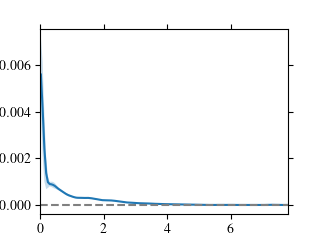

In [24]:
wedge = 45
rmax = 8
lines = ["continuum", "13CO", "C18O", "SO"]
robust = 2.0
dv = 0.2
for line in lines:
    if line == "continuum":
        mapname = au.VADPpath + au.get_image_basename(source=source, baseline=config, line=line, robust=robust, type="image", other="taper_1000klambda")
        savefilename_prefix = mapname.replace(".fits", "_radialProfileWedge{}deg".format(wedge))
    else:
        mapname = au.VADPpath + au.get_image_basename(source=source, baseline=config, line=line, robust=robust, dv=dv).replace(".fits", "_M0.fits")
        savefilename_prefix = mapname.replace("_M0.fits", "_radialProfileWedge{}deg".format(wedge))
    # data_scaling_factor = 1e3 if line == "continuum" else 1.0
    mom0map = FitsImage(mapname, xlim=(-rmax, rmax), ylim=(-rmax, rmax))
    mom0map.shift_phasecenter_toward(center_coord)
    # side_mask = mom0map.get_mask(PA=PA, incl=incl, thetamin=-180, thetamax=0.0)
    unit = "mJy/beam" if line == "continuum" else "mJy/beam km/s"
    r, I, dI = mom0map.radial_profile(
        PA=PA,
        incl=incl,
        rmax=rmax,
        assume_correlated=True,
        user_mask=None,
        thetamin=-180,
        thetamax=-180 + wedge,
        abs_theta=True,
        convolve=False,
        tolerance=0.1,
        save=True,
        savefileheader=f"r [arcsec] \t I [{unit}] \t dI [{unit}]",
        savefilename=savefilename_prefix + "West.txt",
    )

    plt.figure()
    # plt.plot(r, I)
    # plt.fill_between(r, I - dI, I + dI, alpha=0.25, edgecolor=None)

    # side_mask = mom0map.get_mask(PA=PA, incl=incl, thetamin=0.0, thetamax=180.0)
    r, I, dI = mom0map.radial_profile(
        PA=PA,
        incl=incl,
        rmax=rmax,
        assume_correlated=True,
        user_mask=None,
        thetamin=-wedge,
        thetamax=0.0,
        abs_theta=True,
        convolve=False,
        tolerance=0.1,
        save=True,
        savefileheader=f"r [arcsec] \t I [{unit}] \t dI [{unit}]",
        savefilename=savefilename_prefix + "East.txt",
    )
    # plt.plot(r, I)
    # plt.fill_between(r, I - dI, I + dI, alpha=0.25, edgecolor=None)

    # side_mask = mom0map.get_mask(PA=PA, incl=incl, thetamin=0.0, thetamax=180.0)
    r, I, dI = mom0map.radial_profile(
        PA=PA,
        incl=incl,
        rmax=rmax,
        assume_correlated=True,
        user_mask=None,
        thetamin=-180+wedge,
        thetamax=-wedge,
        abs_theta=True,
        exclude_theta=True,
        convolve=False,
        tolerance=0.1,
        save=True,
        savefileheader=f"r [arcsec] \t I [{unit}] \t dI [{unit}]",
        savefilename=savefilename_prefix + ".txt",
    )
    plt.plot(r, I)
    plt.fill_between(r, I - 3*dI, I + 3*dI, alpha=0.25, edgecolor=None)
    plt.axhline(y=0.0, color="grey", ls="dashed")
    plt.xlim(0, 7.8)
    # plt.yscale("log")

/home/yamato/Project/eDisk/firstlook_L1489IRS/.venv/lib/python3.8/site-packages/qdisk/plot.py:216: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if fitsname_or_data == "self":


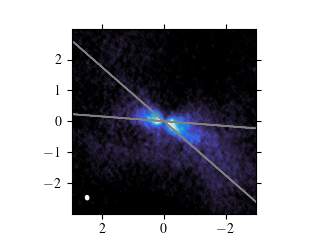

In [19]:
maps = Map(mapname, center_coord=center_coord, xlim=(-rmax, rmax), ylim=(-rmax, rmax))
maps.plot_colormap(cmap=eplot.cmap["M0"], vmin=0.0)
maps.overlay_contour(mom0map.mask, x=mom0map.x, y=mom0map.y)
maps.add_beam()

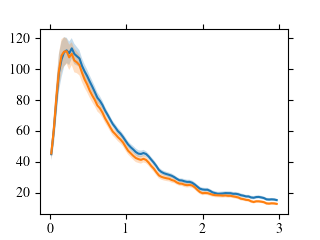

In [10]:
fig, ax = plt.subplots()
for side in ["Near", "Far"]:
    radprofname = au.VADPpath + au.get_image_basename(
        source=source, baseline=config, line="continuum", robust=robust, type="pbcor"
    ).replace(".fits", "_radialProfileWedge45deg{:s}side.txt".format(side))

    r, I, dI = np.loadtxt(radprofname, unpack=True)

    # dI /= np.nanmax(I)
    # I /= np.nanmax(I)

    ax.plot(r, I, label=eplot.linelabel_noqn[line])
    ax.fill_between(r, I - dI, I + dI, alpha=0.25, edgecolor=None)